In [ ]:
# Этап 1. Генерация данных
# Для генераии данных возможно выбрать поднабор изображений в количестве 10-50 шт, "нарезку" патчей выполнить по ним.
# Изучите набор данных, располагающийся в архиве blood_cells.
# Выполните "нарезку" изображений. Сохраните в отдельные папки изображения фона и изображения клеток.
# Реализуйте генератор данных снимков клеток крови. На выходе генератор предосталвяет два изображения: сгенерированное без шума, сгенерированное с шумом.
# Патчи для формирования фона:
# 1) патчи, вырезанные из исходного набора данных
# 2) искусственно сформированные патчи (равномерная заливка фона из диапазона допустимых значений)
# Фон изображения формируется из набора патчей.
# Патчи для клеток крови:
# 1) патчи, вырезанные из исходного набора данных
# 2) искусствено сгенерированные окружности с заливкой из допустимого набора данных
# для blending-задачи применять: https://learnopencv.com/seamless-cloning-using-opencv-python-cpp/
# Примеры генераторов и загрузчиков данных найдете в исходной папке.
##########
# Основные этапы генерации:
# 1. Выбор, формирование патчей, их препроцессинг. Формирование(комбинирование) фона из набора патчей. Постпроцессинг результирующего фона.
# 2. Выбор метоположения клекток, выбор/формирование клеток, совмещение клеток на фоновом изображении
# 3. Выбор типа шума. Зашумление изображения.
#
# Генератор возвращает два изображения: зашумленное (этап 3) и исходное (этап 2) изображения.

# Этап 2. Исследование качества работы алгоритмов шумоподавления на сформированном датасете.
# Виды шумов:
# 1) Шум Гаусса
# 2) постоянный шум
# Виды фильтров:
# 1) Медианный фильтр
# 2) фильтр гаусса
# 3) билатериальный фильтр
# 4) фильтр нелокальных средних с различными параметрами.
# 5.1) самостоятелная реализация алгоритма шумоподавления (CPU)
# 5.2) самостоятелная реализация алгоритма шумоподавления (GPU)
# Метрики:
# 1) MSE
# 2) SSIM
# 3) время работы
#

In [2]:
!unzip /content/blood.zip -d /content/


Archive:  /content/blood.zip
   creating: /content/blood/
 extracting: /content/blood/fon1.png  
 extracting: /content/blood/fon10.png  
 extracting: /content/blood/fon11.png  
 extracting: /content/blood/fon12.png  
 extracting: /content/blood/fon13.png  
 extracting: /content/blood/fon14.png  
 extracting: /content/blood/fon15.png  
 extracting: /content/blood/fon16.png  
 extracting: /content/blood/fon17.png  
 extracting: /content/blood/fon18.png  
 extracting: /content/blood/fon19.png  
 extracting: /content/blood/fon2.png  
 extracting: /content/blood/fon20.png  
 extracting: /content/blood/fon21.png  
 extracting: /content/blood/fon3.png  
 extracting: /content/blood/fon4.png  
 extracting: /content/blood/fon5.png  
 extracting: /content/blood/fon6.png  
 extracting: /content/blood/fon7.png  
 extracting: /content/blood/fon8.png  
 extracting: /content/blood/fon9.png  
 extracting: /content/blood/patch1.png  
 extracting: /content/blood/patch10.PNG  
 extracting: /content/blood/

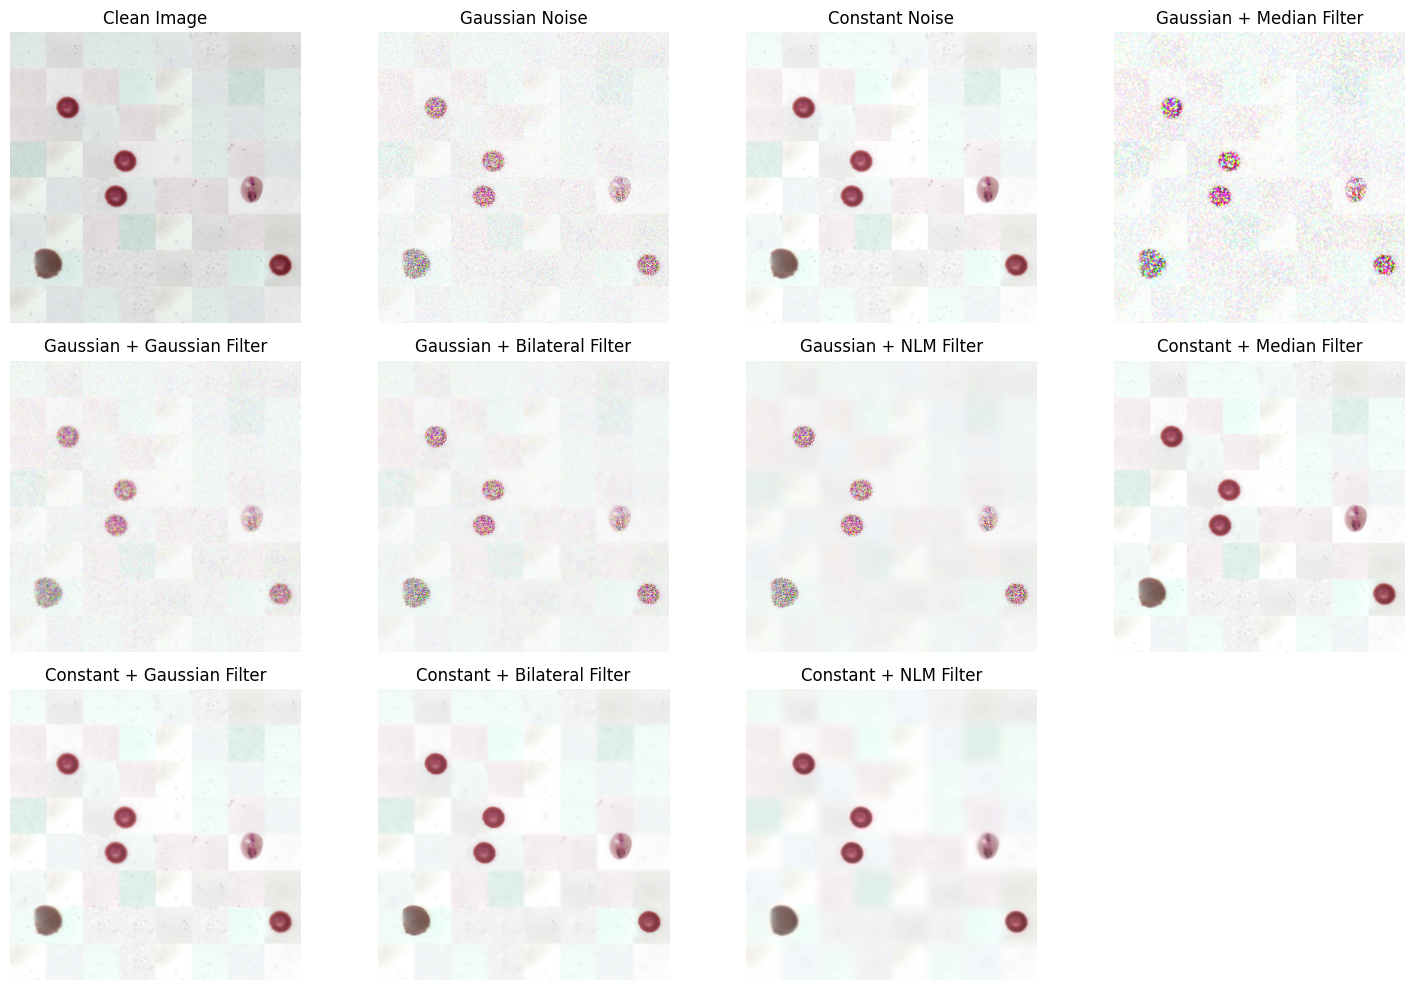


--- Итоги работы ---
Gaussian Noise: MSE = 245.9251, SSIM = 0.3192
Constant Noise: MSE = 420.8428, SSIM = 0.9894
Gaussian + Median Filter: MSE = 314.8449, SSIM = 0.4310
Gaussian + Gaussian Filter: MSE = 354.9172, SSIM = 0.7882
Gaussian + Bilateral Filter: MSE = 353.2698, SSIM = 0.8259
Gaussian + NLM Filter: MSE = 345.6592, SSIM = 0.8452
Constant + Median Filter: MSE = 390.4151, SSIM = 0.9557
Constant + Gaussian Filter: MSE = 385.0577, SSIM = 0.9546
Constant + Bilateral Filter: MSE = 357.6779, SSIM = 0.9274
Constant + NLM Filter: MSE = 347.4157, SSIM = 0.8951
Время работы: 7.0357 секунд



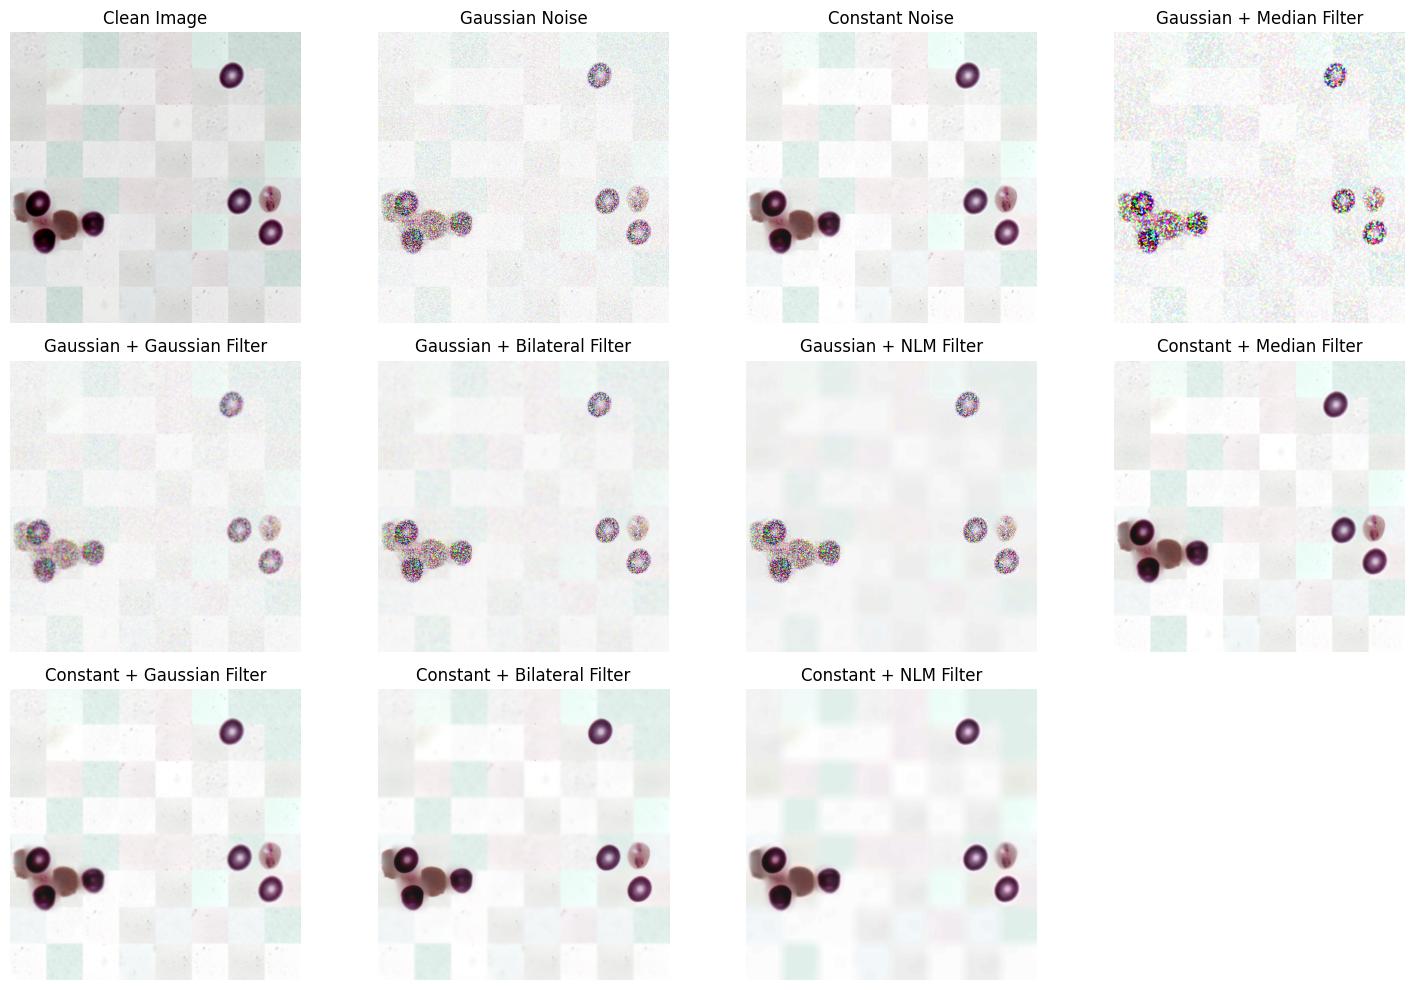


--- Итоги работы ---
Gaussian Noise: MSE = 249.9478, SSIM = 0.2939
Constant Noise: MSE = 422.5239, SSIM = 0.9884
Gaussian + Median Filter: MSE = 318.7084, SSIM = 0.3962
Gaussian + Gaussian Filter: MSE = 354.7877, SSIM = 0.7607
Gaussian + Bilateral Filter: MSE = 355.8474, SSIM = 0.7902
Gaussian + NLM Filter: MSE = 347.1586, SSIM = 0.8151
Constant + Median Filter: MSE = 394.7593, SSIM = 0.9568
Constant + Gaussian Filter: MSE = 389.6796, SSIM = 0.9532
Constant + Bilateral Filter: MSE = 360.3838, SSIM = 0.9268
Constant + NLM Filter: MSE = 347.1865, SSIM = 0.8964
Время работы: 12.6769 секунд



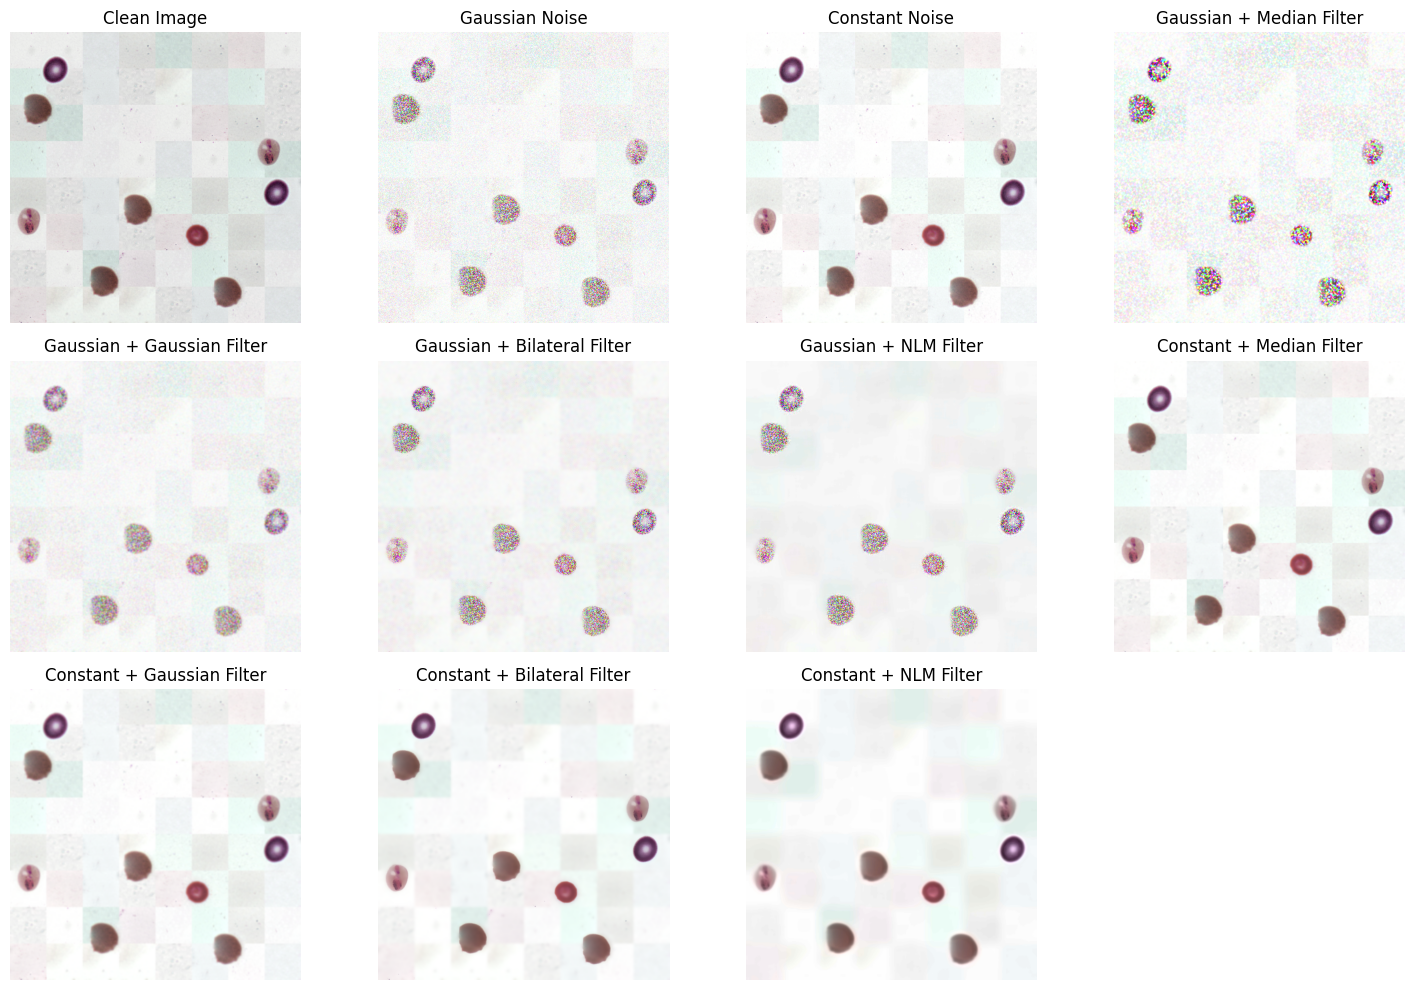


--- Итоги работы ---
Gaussian Noise: MSE = 244.4898, SSIM = 0.3258
Constant Noise: MSE = 412.7553, SSIM = 0.9895
Gaussian + Median Filter: MSE = 313.4312, SSIM = 0.4385
Gaussian + Gaussian Filter: MSE = 357.6509, SSIM = 0.7825
Gaussian + Bilateral Filter: MSE = 358.9089, SSIM = 0.8099
Gaussian + NLM Filter: MSE = 347.4900, SSIM = 0.8271
Constant + Median Filter: MSE = 387.4611, SSIM = 0.9586
Constant + Gaussian Filter: MSE = 381.5151, SSIM = 0.9565
Constant + Bilateral Filter: MSE = 356.0673, SSIM = 0.9318
Constant + NLM Filter: MSE = 344.9788, SSIM = 0.9012
Время работы: 19.5819 секунд



In [6]:
import cv2
import numpy as np
import random
import os
from glob import glob
import time
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# Пути к данным
data_dir = "blood"
generated_data_dir = "generated_data"

PATCH_SIZE = (64, 64)
IMAGE_SIZE = (512, 512)
NUM_CELLS_RANGE = (2, 10)

# Загружаем пути к файлам
cell_files = glob(os.path.join(data_dir, "patch*.png"))
background_files = glob(os.path.join(data_dir, "fon*.png"))

if not cell_files or not background_files:
    raise ValueError("Не найдены файлы клеток или фона в папке 'blood'!")

# Функция для создания случайного фонового изображения 512x512
def create_background(image_size=IMAGE_SIZE):
    background = np.zeros((image_size[1], image_size[0], 3), dtype=np.uint8)
    patch_size = PATCH_SIZE

    num_patches_x = image_size[0] // patch_size[0]
    num_patches_y = image_size[1] // patch_size[1]

    for i in range(num_patches_y):
        for j in range(num_patches_x):
            patch = cv2.imread(random.choice(background_files))
            if patch is None:
                continue
            patch = cv2.resize(patch, patch_size, interpolation=cv2.INTER_AREA)
            background[i * patch_size[1]:(i + 1) * patch_size[1], j * patch_size[0]:(j + 1) * patch_size[0]] = patch

    return background

# Функция для наложения клеток на фон
def place_cell(background, cell):
    bg_h, bg_w, _ = background.shape
    cell_h, cell_w, _ = cell.shape
    mask = 255 * np.ones((cell_h, cell_w), dtype=np.uint8)
    x = random.randint(0, bg_w - cell_w)
    y = random.randint(0, bg_h - cell_h)
    center = (x + cell_w // 2, y + cell_h // 2)
    return cv2.seamlessClone(cell, background, mask, center, cv2.NORMAL_CLONE)

# Функции добавления шума
def add_gaussian_noise(image, mean=0, sigma=10):
    noise = np.random.normal(mean, sigma, image.shape).astype(np.uint8)
    return cv2.add(image, noise)

def add_constant_noise(image, value=20):
    return cv2.add(image, value)

# Фильтры для шумоподавления
def apply_median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)

def apply_gaussian_filter(image, kernel_size=5, sigma=1):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

def apply_bilateral_filter(image, d=9, sigmaColor=75, sigmaSpace=75):
    return cv2.bilateralFilter(image, d, sigmaColor, sigmaSpace)

def apply_nlm_filter(image, h=10, templateWindowSize=7, searchWindowSize=21):
    return cv2.fastNlMeansDenoisingColored(image, None, h, templateWindowSize, searchWindowSize)

# Метрики
def mse(imageA, imageB):
    err = np.sum((imageA - imageB) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

def compute_ssim(imageA, imageB):
    return ssim(imageA, imageB, multichannel=True, win_size=3)

start_time = time.time()

# Генератор данных
def data_generator():
    os.makedirs(generated_data_dir, exist_ok=True)
    while True:
        background = create_background()
        clean_image = background.copy()
        num_cells = random.randint(NUM_CELLS_RANGE[0], NUM_CELLS_RANGE[1])

        for _ in range(num_cells):
            cell = cv2.imread(random.choice(cell_files))
            if cell is None:
                continue
            cell = cv2.resize(cell, PATCH_SIZE, interpolation=cv2.INTER_AREA)
            clean_image = place_cell(clean_image, cell)

        noisy_gaus_image = add_gaussian_noise(clean_image.copy())
        noisy_constant_image = add_constant_noise(clean_image.copy())

        # Сохраняем изображения
        cv2.imwrite(os.path.join(generated_data_dir, f"clean_{random.randint(1000, 9999)}.png"), clean_image)
        cv2.imwrite(os.path.join(generated_data_dir, f"noisy_gaussian_{random.randint(1000, 9999)}.png"), noisy_gaus_image)
        cv2.imwrite(os.path.join(generated_data_dir, f"noisy_constant_{random.randint(1000, 9999)}.png"), noisy_constant_image)

        yield noisy_gaus_image, noisy_constant_image, clean_image

# Пример генерации и применения фильтров
generator = data_generator()

for i in range(3):
    noisy_gaus_image, noisy_constant_image, clean_image = next(generator)

    # Применяем фильтры
    denoised_gaus_median = apply_median_filter(noisy_gaus_image)
    denoised_gaus_gaussian = apply_gaussian_filter(noisy_gaus_image)
    denoised_gaus_bilateral = apply_bilateral_filter(noisy_gaus_image)
    denoised_gaus_nlm = apply_nlm_filter(noisy_gaus_image)

    denoised_constant_median = apply_median_filter(noisy_constant_image)
    denoised_constant_gaussian = apply_gaussian_filter(noisy_constant_image)
    denoised_constant_bilateral = apply_bilateral_filter(noisy_constant_image)
    denoised_constant_nlm = apply_nlm_filter(noisy_constant_image)

    # Отображаем результаты
    plt.figure(figsize=(15, 10))

    images = [
        ("Clean Image", clean_image),
        ("Gaussian Noise", noisy_gaus_image),
        ("Constant Noise", noisy_constant_image),
        ("Gaussian + Median Filter", denoised_gaus_median),
        ("Gaussian + Gaussian Filter", denoised_gaus_gaussian),
        ("Gaussian + Bilateral Filter", denoised_gaus_bilateral),
        ("Gaussian + NLM Filter", denoised_gaus_nlm),
        ("Constant + Median Filter", denoised_constant_median),
        ("Constant + Gaussian Filter", denoised_constant_gaussian),
        ("Constant + Bilateral Filter", denoised_constant_bilateral),
        ("Constant + NLM Filter", denoised_constant_nlm),
    ]

    for idx, (title, img) in enumerate(images, 1):
        plt.subplot(3, 4, idx)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Метрики
    metrics = [
        ("Gaussian Noise", mse(clean_image, noisy_gaus_image), compute_ssim(clean_image, noisy_gaus_image)),
        ("Constant Noise", mse(clean_image, noisy_constant_image), compute_ssim(clean_image, noisy_constant_image)),
        ("Gaussian + Median Filter", mse(clean_image, denoised_gaus_median), compute_ssim(clean_image, denoised_gaus_median)),
        ("Gaussian + Gaussian Filter", mse(clean_image, denoised_gaus_gaussian), compute_ssim(clean_image, denoised_gaus_gaussian)),
        ("Gaussian + Bilateral Filter", mse(clean_image, denoised_gaus_bilateral), compute_ssim(clean_image, denoised_gaus_bilateral)),
        ("Gaussian + NLM Filter", mse(clean_image, denoised_gaus_nlm), compute_ssim(clean_image, denoised_gaus_nlm)),
        ("Constant + Median Filter", mse(clean_image, denoised_constant_median), compute_ssim(clean_image, denoised_constant_median)),
        ("Constant + Gaussian Filter", mse(clean_image, denoised_constant_gaussian), compute_ssim(clean_image, denoised_constant_gaussian)),
        ("Constant + Bilateral Filter", mse(clean_image, denoised_constant_bilateral), compute_ssim(clean_image, denoised_constant_bilateral)),
        ("Constant + NLM Filter", mse(clean_image, denoised_constant_nlm), compute_ssim(clean_image, denoised_constant_nlm)),
    ]

    print("\n--- Итоги работы ---")
    for name, mse_value, ssim_value in metrics:
        print(f"{name}: MSE = {mse_value:.4f}, SSIM = {ssim_value:.4f}")

    print(f"Время работы: {time.time() - start_time:.4f} секунд\n")


In [7]:
!zip -r generated_data.zip generated_data


  adding: generated_data/ (stored 0%)
  adding: generated_data/noisy_gaussian_1568.png (deflated 0%)
  adding: generated_data/clean_7667.png (deflated 5%)
  adding: generated_data/noisy_gaussian_2174.png (deflated 0%)
  adding: generated_data/noisy_constant_2670.png (deflated 4%)
  adding: generated_data/noisy_gaussian_8591.png (deflated 0%)
  adding: generated_data/clean_8031.png (deflated 4%)
  adding: generated_data/clean_4093.png (deflated 4%)
  adding: generated_data/noisy_constant_8171.png (deflated 4%)
  adding: generated_data/noisy_constant_3160.png (deflated 4%)
  adding: generated_data/noisy_constant_4512.png (deflated 5%)
  adding: generated_data/clean_3217.png (deflated 3%)
  adding: generated_data/noisy_constant_7321.png (deflated 3%)
  adding: generated_data/noisy_constant_7329.png (deflated 3%)
  adding: generated_data/noisy_constant_8998.png (deflated 3%)
  adding: generated_data/noisy_gaussian_3581.png (deflated 0%)
  adding: generated_data/noisy_gaussian_5414.png (def